In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
DATA_PATH_SINHVIEN_DTB_HOCKY = '/content/drive/MyDrive/Education_dataset_V2/sinhvien_dtb_hocky.xlsx'
DATA_PATH_DRL_RAW = '/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/2.dataset_raw/drl_raw.csv'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df_dtb_hocky = pd.read_excel(DATA_PATH_SINHVIEN_DTB_HOCKY)
df_drl_raw = pd.read_csv(DATA_PATH_DRL_RAW)

# Chuyển điểm trung bình học kì theo chiều ngang

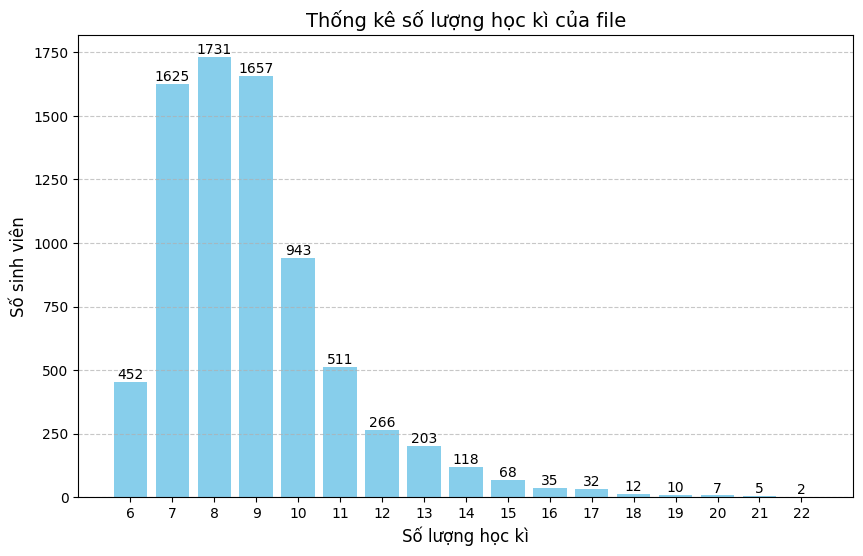

In [11]:
# Thống kê để xem phân phối các kì như thế nào
semester_count = df_dtb_hocky.groupby('mssv').size()
# Đếm số lượng kì mà sinh viên tham dự
semester_distribution = semester_count.value_counts().sort_index()

# Filter to only include semesters between 6 and 24
filtered_distribution = semester_distribution[(semester_distribution.index >= 6) & (semester_distribution.index <= 26)]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_distribution.index, filtered_distribution.values, color='skyblue')

# Adding labels and title
plt.xlabel('Số lượng học kì', fontsize=12)
plt.ylabel('Số sinh viên', fontsize=12)
plt.title('Thống kê số lượng học kì của file', fontsize=14)

# Show the chart
plt.xticks(filtered_distribution.index)  # Ensure all semester numbers are shown on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()

In [12]:
df_dtb_hocky.sort_values(by=['mssv', 'namhoc', 'hocky'], inplace=True,ascending=True)

In [13]:
# Fill missing semesters for a maximum of 3 semesters per year and 24 semesters
def fill_learning_process(df, max_semesters=24, semesters_per_year=3):
    filled_data = []
    for mssv, group in df.groupby("mssv"):
        # Generate the learning process
        semester_index = 1
        for year in range(group["namhoc"].min(), group["namhoc"].min() + (max_semesters // semesters_per_year)):
            for semester in range(1, semesters_per_year + 1):
                if semester_index > max_semesters:
                    break
                # Check if this year and semester exist in the data
                match = group[(group["namhoc"] == year) & (group["hocky"] == semester)]
                if not match.empty:
                    # Use existing data
                    row = match.iloc[0].to_dict()
                    row["semester_index"] = semester_index
                    filled_data.append(row)
                else:
                    # Fill with missing data
                    filled_data.append({
                        "mssv": mssv,
                        "namhoc": year,
                        "hocky": semester,
                        "dtbhk": -1,
                        "semester_index": semester_index,
                    })
                semester_index += 1
    return pd.DataFrame(filled_data)


In [14]:
df_filled = fill_learning_process(df_dtb_hocky)

In [15]:
df_filled = df_filled[df_filled['semester_index']<=22]

In [16]:
# Pivot the DataFrame to make it horizontal
pivot_df = df_filled.pivot(index="mssv", columns="semester_index", values="dtbhk")


# Rename columns for clarity
pivot_df = pivot_df.rename(columns=lambda x: f"sem{x}" if isinstance(x, int) else x)

# Handle missing values (optional)
pivot_df = pivot_df.fillna(0)

# Reset index to include `mssv` as a column (optional)
pivot_df = pivot_df.reset_index()

In [17]:
#đọc file đrl raw
df_drl_raw = pd.read_csv(DATA_PATH_DRL_RAW)

In [18]:
pd_merge = pd.merge(pivot_df, df_drl_raw, on='mssv')

In [19]:
pd_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mssv     7593 non-null   object 
 1   sem1     7593 non-null   float64
 2   sem2     7593 non-null   float64
 3   sem3     7593 non-null   float64
 4   sem4     7593 non-null   float64
 5   sem5     7593 non-null   float64
 6   sem6     7593 non-null   float64
 7   sem7     7593 non-null   float64
 8   sem8     7593 non-null   float64
 9   sem9     7593 non-null   float64
 10  sem10    7593 non-null   float64
 11  sem11    7593 non-null   float64
 12  sem12    7593 non-null   float64
 13  sem13    7593 non-null   float64
 14  sem14    7593 non-null   float64
 15  sem15    7593 non-null   float64
 16  sem16    7593 non-null   float64
 17  sem17    7593 non-null   float64
 18  sem18    7593 non-null   float64
 19  sem19    7593 non-null   float64
 20  sem20    7593 non-null   float64
 21  sem21    7593 

In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/tabular_lstm/tabular_lstm_clean.csv')

In [21]:
df_merge_final = pd_merge[pd_merge['mssv'].isin(df_clean['mssv'])]

In [22]:
df_merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5181 entries, 0 to 7592
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mssv     5181 non-null   object 
 1   sem1     5181 non-null   float64
 2   sem2     5181 non-null   float64
 3   sem3     5181 non-null   float64
 4   sem4     5181 non-null   float64
 5   sem5     5181 non-null   float64
 6   sem6     5181 non-null   float64
 7   sem7     5181 non-null   float64
 8   sem8     5181 non-null   float64
 9   sem9     5181 non-null   float64
 10  sem10    5181 non-null   float64
 11  sem11    5181 non-null   float64
 12  sem12    5181 non-null   float64
 13  sem13    5181 non-null   float64
 14  sem14    5181 non-null   float64
 15  sem15    5181 non-null   float64
 16  sem16    5181 non-null   float64
 17  sem17    5181 non-null   float64
 18  sem18    5181 non-null   float64
 19  sem19    5181 non-null   float64
 20  sem20    5181 non-null   float64
 21  sem21    5181 non-n

In [23]:
df_merge_final.to_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/lstm_data/lstm_raw.csv',index=False)